---
## 🎁 TÜR 6: Erdnusskonsum im Jahr

### 0. Python vorbereiten
Importiere die Libraries `numpy` und `pandas`.

___
### __PROBLEMSTELLUNG__

In dieser Aufgaben sollten Sie eine Funktion erstellen, welche für Daten aus unterschiedlichen Jahren die **totale monatliche Goldproduktion aller Abbauorte** berechnet und die maximale Produktion ausgibt. Das heisst, Ihre Funktion sollte:
1. die totale Menge Gold berechnen, die monatlich produziert wird (Summe aller Abbauorte);
2. die maximale monatliche Produktion finden, und den zugehörigen Monat identifizieren;
3. die maximale monatliche Produktion und den zugehörigen Monat ausgeben.

**Als Inputdaten erhalten Sie pro Abbauort die monatliche Goldproduktion für 5 Jahre ab 2010.** Diese Daten sind in folgenden Dateien erhalten:
- `names_sites.dat` beinhaltet die Namen der Abbauorte
- `data_sites_<year>.dat` ist ein *Satz* an Dateien (z.B. `data_sites_2011.dat`), welche die monatliche Goldproduktion (in kg) dieser Abbauorte enthält (jeder Monat in einer neuen Reihe). Pro Jahr gibt es eine Datei, wobei das Jahr Teil des Dateinamen ist. 

Jede Datei `data_sites_<year>.dat` hat die folgende Struktur:

```{csv-table} 
:width: 50%
:header: "site1", "site2", ... 
116.04, 107.24, ...
55.31, 56.54, ... 
55.65, 86.01, ...
..., ..., ... 
```

### __0. Python vorbereiten__

<font color=#ff0000>0.1)</font> <font color=#208de2>__Importieren Sie__</font> `numpy` and `matplotlib.pyplot` unter ihren üblichen Kurznamen.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

:::{important} **1. Aufgabe lösen**
Als Erstes sollten Sie die Daten anschauen damit Sie ihre Struktur besser vestehen können.
:::

#### __1.1 Analyse des Jahres 2010__

<font color=#ff0000>1.1)</font> <font color=#208de2>__Laden Sie die Daten *für das Jahr  2010*__</font> mit der Funktion `loadtxt` aus `numpy` und speichern Sie diese in ein Array Namens `daten_2010`. 

<font color=#208de2>__Laden Sie zudem die Namen der Abbauorte__</font> in ein Array namens `ortsnamen`.

> <font color=#cc257b>Wie in der Übung zu dieser Lektion müssen Sie beim Einlesen der Ortsnamen explizit angeben, dass der Datentyp `str` ist. Schauen Sie da nach, wie Sie das machen können.

In [2]:
daten_2010 = np.loadtxt("data_sites_2010.dat")
ortsnamen = np.loadtxt("names_sites.dat", dtype=str)

<font color=#ff0000>1.2)</font> <font color=#208de2>__Lassen Sie nun beide Arrays ausgeben,__</font> um sicherzustellen dass sie korrekt geladen wurden.

In [3]:
print(daten_2010)
print(ortsnamen)

[[ 8.17760978 10.99932301  6.58433353  9.62848201 11.62300017 10.47422385]
 [ 6.90254206  6.47877078 12.24077181 14.53043579  9.43135397 10.52639765]
 [ 7.99148216 12.09826279  8.01476822 10.98566202  8.94518656  9.09408064]
 [ 8.73818606 18.87172111 11.64522432  6.33403199 15.71760426 12.63554739]
 [10.33944662 11.26157746  7.98733141  6.00594767 12.46610522 10.14312055]
 [17.03703166  7.10934857  8.42368316  3.31695297 12.5411919   8.55850833]
 [10.11796657  8.39301994 13.24704122  7.94372067  6.68414217  9.49221375]
 [10.79579464 13.70216935  7.25444274 12.62432093  9.95902694  9.53635788]
 [18.89983846 14.79955272 12.28198331  2.76262166 11.92236582 10.00378098]
 [15.45532403  2.50237622 15.34813127 14.22276459  8.83546332 13.79630368]
 [ 7.6809273  11.95785276  3.11527984 11.20073641 14.77436662  4.97163886]
 [13.88761132  5.66440013  6.54405072  7.26748375  7.19529468  7.50018071]]
['Zuripy' 'Baselpy' 'Winthpy' 'Luzernpy' 'Schwpy' 'Churpy']


<font color=#ff0000>1.3)</font> <font color=#208de2>__Plotten Sie die monatliche Goldproduktion in 2010 für jeden Abbauort als Zeitreihe.__</font> 

:::{hint}Tipp
<font color=#cc257b> Für die $x$-Achse können Sie einfach ein Array mit Zahlen von 1 bis 12 gebrauchen. Die $y$-Achse gibt die monatliche Produktion an. 
:::

<font color=#208de2>__Benutzen Sie das Array `ortsnamen` um jede Zeitreihe mit einem Label zu versehen. Zeigen Sie diese Namen in einer Legende an.__</font>

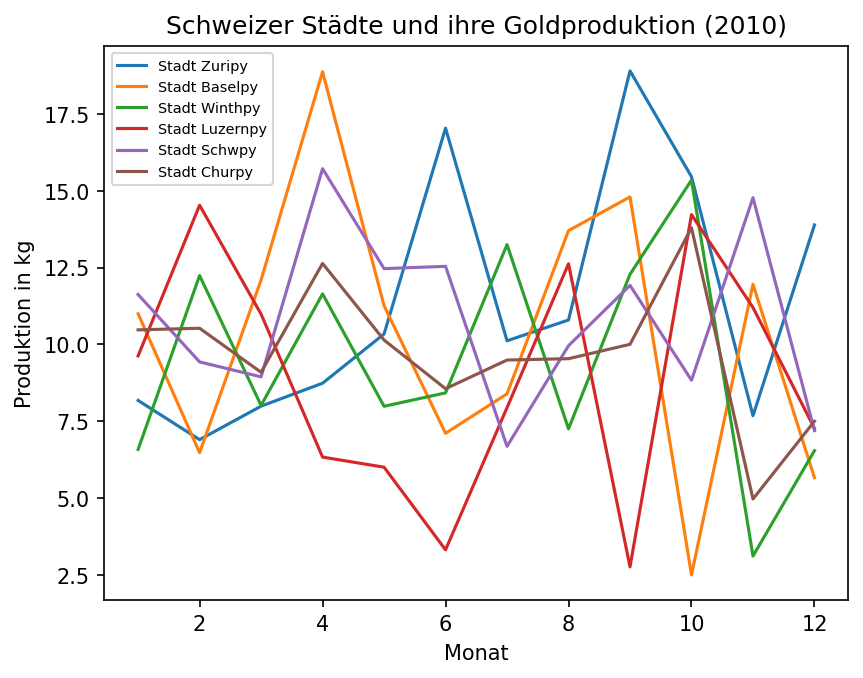

In [6]:
fig, ax = plt.subplots(dpi=150)

gold_x = np.arange(1, 13)

for idx, name in enumerate(ortsnamen):
    ax.plot(gold_x, daten_2010[:, idx], label=f"Stadt {name}")

ax.set(
    xlabel='Monat',
    ylabel='Produktion in kg',
    title='Schweizer Städte und ihre Goldproduktion (2010)'
)

plt.legend(fontsize='x-small', loc='upper left')
plt.show()


<font color=#ff0000>1.4)</font> Jetzt können Sie <font color=#208de2>__die totale Goldproduktion pro Monat im Jahr 2010 berechnen,__</font> indem Sie einfach die Produktion aller Orte aufsummieren.

:::{caution} Achtung!
Zur Erinnerung:</b> Im Array <code>daten_2010</code> sind die Daten für jeden Ort in einer separaten Spalte angegeben, eine Reihe pro Monat. Sie müssen also die Summe _entlang der Reihen_ berechnen. Benutzen Sie die Funtion <code>np.sum(...)</code> mit dem Keyword-Argument <code>axis=1</code> um dies zu spezifizieren.
:::

In [7]:
summe = np.sum(daten_2010, axis=1)

<font color=#ff0000>1.5)</font> <font color=#208de2>__Plotten Sie nun die totale monatliche Produktion im Jahr 2010.__</font>

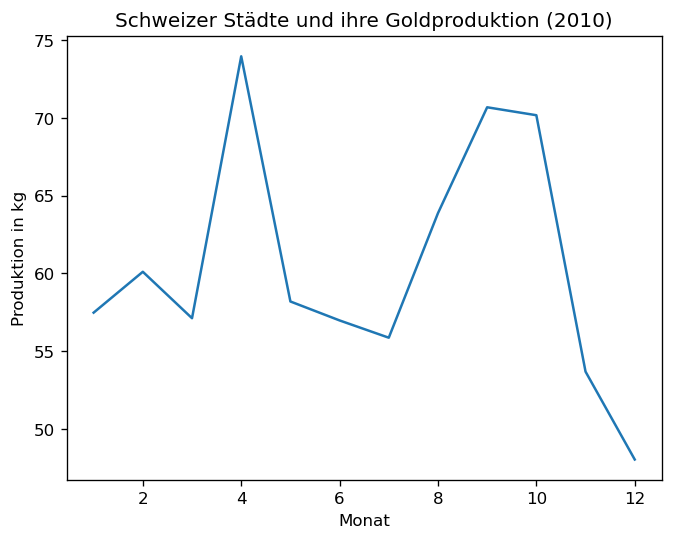

In [8]:
fig, ax = plt.subplots(dpi=120)


gold_x = np.arange(1, 13)
gold_y = summe
ax.plot(
    gold_x, 
    gold_y, 
    '-'
)

ax.set(
    xlabel='Monat',
    ylabel='Produktion in kg',
    title=f'Schweizer Städte und ihre Goldproduktion ({2010})'
)

plt.show()


:::{important} **2. Analyse** 
Analyse auf alle Jahre ausweiten
:::

<font color=#ff0000>2.1)</font> Jetzt dass Sie wissen, wie Sie die totale monatliche Produktion berechnen, können Sie eine Funktion erstellen **um die _maximale_ monatliche Gesamtproduktion und den zugehörigen Monat zu identifizieren.**


:::{hint} Tipp 1
Die Struktur der Funktion sollte in etwa so aussehen:

```code python
def maxmonthprod(year) : 
    ... # Input der Daten für das Jahr "year" einlesen ("year" ist ein Argument der Funktion)
    ... # monatliche Gesamtproduktion berechnen
    ... # identifiziere die maximale Produktion und den Monat des Maximums
    return maxprod,monthnum 
```
Die obige Funktion gibt 2 Variablen zurück: die maximale totale Monatsproduktion und den Monat des Maximums (Zahl zwischen 1 und 12).
:::

:::{hint} Tipp 2
Um den Monat mit maximaler Gesamtproduktion zu identifizieren, können Sie die Funktion <code>np.argmax(ndarray)</code> gebrauchen, wobei <code>ndarray</code> das Array mit der monatlichen Gesamtproduktion ist. <code>np.argmax(ndarray)</code> gibt Ihnen den **Index** des Maximums in <code>ndarray</code>.

Zum Beispiel, gegeben: <br>
<code>a = np.array([3,4,6,8,3,1])</code><br>
können Sie sagen:<br>
<code>index = np.argmax(a)</code><br>
was Ihnen den Index des Elements mit dem maximalen Wert angibt.

Die maximale Produktion würden Sie dann erhalten mit <code>maxval = a[index]</code>.

Und den _Monat_ mit der maximalen Produktion wäre dann <code>maxmonth = index + 1</code>, weil in Python Indizes bei 0 anfangen.
:::

In [10]:
def maxmonthprod(year):
    # Input der Daten für das Jahr "year" einlesen ("year" ist ein Argument der Funktion)
    daten_year = np.loadtxt(f"data_sites_{year}.dat")

    # monatliche Gesamtproduktion berechnen
    gesprod = np.sum(daten_year, axis=1)
    
    # identifiziere die maximale Produktion und den Monat des Maximums
    # 1. Index des Monats mit maximaler Produktion
    idx_max = np.argmax(gesprod)

    # 2. Maximale Produktion
    maxprod = gesprod[idx_max]

    # 3. Monat
    monthnum = idx_max + 1

    return maxprod, monthnum

:::{important} **3. Resultate**
Resultate für alle Jahre ausgeben 
:::

<font color=#ff0000>3.1)</font> <font color=#208de2>__Benutzen Sie nun Ihre Funktion,__</font> um **für jedes Jahr von 2010 bis 2014** die maximale Gesamtproduktion an Gold und den dazugehörigen Monat zu identifizieren. 

<font color=#208de2>__Geben Sie Ihre Resultate in einem Satz wie dem folgenden aus,__</font> den Sie für alle Jahre durch eine `for`-Schleife ausgeben lassen können:
```code python
    print("Maximale Produktion von {} kg in Monat Nummer {} im Jahr {}".format(maxprod,monnum,year))
```

In [19]:
# Schleife über alle Jahre
for year in range(2010, 2015):  
    maxprod, monnum = maxmonthprod(year)
    print("Maximale Produktion von {} kg in Monat Nummer {} im Jahr {}".format(maxprod,monnum,year))

Maximale Produktion von 73.94231512430918 kg in Monat Nummer 4 im Jahr 2010
Maximale Produktion von 75.61405794684073 kg in Monat Nummer 1 im Jahr 2011
Maximale Produktion von 75.60295135850653 kg in Monat Nummer 3 im Jahr 2012
Maximale Produktion von 73.44299440024906 kg in Monat Nummer 3 im Jahr 2013
Maximale Produktion von 79.92334069130759 kg in Monat Nummer 9 im Jahr 2014
